In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
import IPython.display as ipd
import os
from tqdm import tqdm
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

In [2]:
import os
import torch
from ast_models import ASTModel


C:\Users\Narender Kumar\anaconda3\lib\site-packages\torch\cuda\amp\autocast_mode.py:118: UserWarning: torch.cuda.amp.autocast only affects CUDA ops, but CUDA is not available.  Disabling.
  warnings.warn("torch.cuda.amp.autocast only affects CUDA ops, but CUDA is not available.  Disabling.")


In [3]:
df_c=pd.DataFrame(columns=["file_name", "label"])
df_p=pd.DataFrame(columns=["file_name", "label"])

dir="./data/Control/"
for index, audio in enumerate(os.listdir(dir)):
    df_c.loc[index]=[audio, 0]
    
dir="./data/Pathology/"
for index, audio in enumerate(os.listdir(dir)):
    df_p.loc[index]=[audio, 1]



In [4]:
def normalize(x, axis=0):
    return minmax_scale(x, axis=axis)


In [5]:

def feature_extractor(file):
    ado, s_rate = librosa.load(file, res_type='kaiser_fast')
    sr_feature = librosa.feature.spectral_rolloff(y=ado, sr=s_rate, center=False)[0]
    sr_normal=normalize(sr_feature)
    return sr_feature

extracted_features=[]
dir="./data/"
for index_num, row in tqdm(df_c.iterrows()):
    file_name=os.path.join(os.path.abspath(dir), "Control", str(row["file_name"]))
    f_label=row["label"]
    data=feature_extractor(file_name)
    extracted_features.append([data, f_label])
    

for index_num, row in tqdm(df_p.iterrows()):
    file_name=os.path.join(os.path.abspath(dir), "Pathology", str(row["file_name"]))
    f_label=row["label"]
    data=feature_extractor(file_name)
    extracted_features.append([data, f_label])
    


39it [00:02, 18.90it/s]
15it [00:00, 28.36it/s]


In [6]:
df_sr=pd.DataFrame(extracted_features, columns=["features", "label"])

In [7]:
df_sr.shape

(54, 2)

In [8]:
# max feature = 341
extracted_features[0][0]

array([1636.5234375 , 1636.5234375 , 1647.29003906, 1647.29003906,
       1636.5234375 , 1647.29003906, 1647.29003906, 1647.29003906,
       1647.29003906, 1636.5234375 , 1625.75683594, 1636.5234375 ,
       1636.5234375 , 1636.5234375 , 1647.29003906, 1658.05664062,
       1658.05664062, 1658.05664062, 1647.29003906, 1636.5234375 ,
       1625.75683594, 1625.75683594, 1636.5234375 , 1636.5234375 ,
       1636.5234375 , 1647.29003906, 1636.5234375 , 1636.5234375 ,
       1647.29003906, 1647.29003906, 1647.29003906, 1647.29003906,
       1658.05664062, 1658.05664062, 1647.29003906, 1647.29003906,
       1658.05664062, 1658.05664062, 1636.5234375 , 1636.5234375 ,
       1636.5234375 , 1636.5234375 , 1647.29003906, 1647.29003906,
       1647.29003906, 1647.29003906, 1636.5234375 , 1636.5234375 ,
       1636.5234375 , 1636.5234375 , 1647.29003906, 1658.05664062,
       1658.05664062, 1647.29003906, 1636.5234375 , 1625.75683594,
       1625.75683594, 1636.5234375 , 1647.29003906, 1647.29003

In [9]:
os.chdir('ast-master\src\models')
os.environ['TORCH_HOME'] = '/ast-master/pretrained_models'
input_tdim=341
label_dim=2
ast_mdl = ASTModel(label_dim=label_dim, input_tdim=input_tdim, imagenet_pretrain=True, audioset_pretrain=True)

---------------AST Model Summary---------------
ImageNet pretraining: True, AudioSet pretraining: True
100% [......................................................................] 352587836 / 352587836frequncey stride=10, time stride=10
number of patches=396


In [10]:
for i in range(len(extracted_features)):
    extracted_features[i][0] = ast_mdl(torch.tensor(extracted_features[i][0]))


IndexError: Dimension out of range (expected to be in range of [-2, 1], but got 2)

In [41]:
extracted_features[0][0].shape

(122,)

In [15]:
df_sr=pd.DataFrame(extracted_features, columns=["features", "label"])

In [ ]:
file="./data/Pathology/008.wav"
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
ado, s_rate = librosa.load(file, res_type='kaiser_fast')
S, phase = librosa.magphase(librosa.stft(ado))
rolloff = librosa.feature.spectral_rolloff(y=ado, sr=s_rate)

librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time')
plt.title('Rolloff spectrogram (ALS)')

plt.subplot(1,2,2)
ado, s_rate = librosa.load(file, res_type='kaiser_fast')
sr_feature = librosa.feature.spectral_rolloff(y=ado, sr=s_rate)[0]
frames = range(len(sr_feature))
t = librosa.frames_to_time(frames)
librosa.display.waveshow(ado, sr=s_rate, alpha=0.4)
plt.plot(t, normalize(sr_feature), color='r')
plt.show()

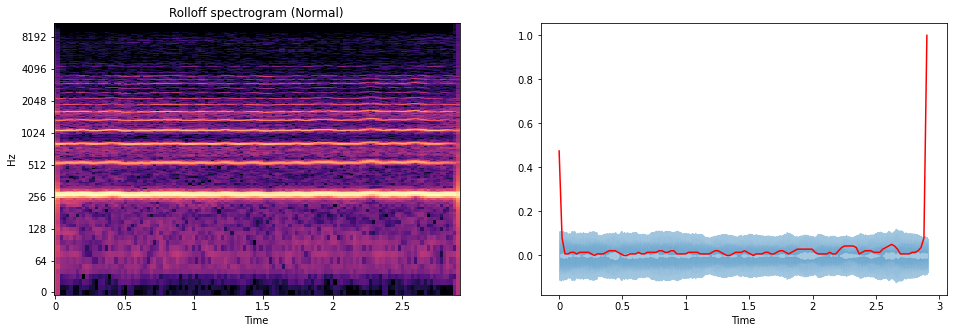

In [17]:
file="data/Control/002.wav"
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
ado, s_rate = librosa.load(file, res_type='kaiser_fast')
S, phase = librosa.magphase(librosa.stft(ado))
rolloff = librosa.feature.spectral_rolloff(y=ado, sr=s_rate)

librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time')
plt.title('Rolloff spectrogram (Normal)')

plt.subplot(1,2,2)
ado, s_rate = librosa.load(file, res_type='kaiser_fast')
sr_feature = librosa.feature.spectral_rolloff(y=ado, sr=s_rate)[0]
frames = range(len(sr_feature))
t = librosa.frames_to_time(frames)
librosa.display.waveshow(ado, sr=s_rate, alpha=0.4)
plt.plot(t, normalize(sr_feature), color='r')
plt.show()

# Train_test_split

In [18]:
df_sr=df_sr.sample(frac=1)

In [19]:
X=np.array(df_sr.features.to_list())
y=np.array(df_sr.label.to_list())

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1, random_state=42)

In [51]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((48, 341), (48, 1), (6, 341), (6, 1))

In [22]:
# vectorized label
y_train = np.asarray(y_train).astype('float32').reshape((-1,1))
y_test = np.asarray(y_test).astype('float32').reshape((-1,1))

# Model

In [34]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.optimizers import Adam
from sklearn import metrics

In [68]:
model=Sequential()

# 1st layer
model.add(Dense(200, input_shape=(341,)))
model.add(Activation("relu"))
# 2st layer
model.add(Dense(100))
model.add(Activation("relu"))
model.add(Dropout(0.5))
# 3st layer
model.add(Dense(50))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Flatten())

# Last layer
model.add(Dense(2))
model.add(Activation("sigmoid"))

In [69]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_48 (Dense)             (None, 200)               68400     
_________________________________________________________________
activation_48 (Activation)   (None, 200)               0         
_________________________________________________________________
dense_49 (Dense)             (None, 100)               20100     
_________________________________________________________________
activation_49 (Activation)   (None, 100)               0         
_________________________________________________________________
dropout_24 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_50 (Dense)             (None, 50)                5050      
_________________________________________________________________
activation_50 (Activation)   (None, 50)              

In [70]:
model.compile(loss="binary_crossentropy", metrics=["accuracy"], optimizer="Adam")

In [71]:
history = model.fit(X_train, to_categorical(y_train, num_classes=2), batch_size=5, validation_data=[X_test, y_test], epochs=100, verbose=1)

Epoch 1/100
10/10 [==============================] - 0s 14ms/step - loss: 8.5057 - accuracy: 0.5625 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/100
10/10 [==============================] - 0s 8ms/step - loss: 6.2415 - accuracy: 0.6875 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 3/100
10/10 [==============================] - 0s 8ms/step - loss: 6.7207 - accuracy: 0.7292 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 4/100
10/10 [==============================] - 0s 15ms/step - loss: 7.1066 - accuracy: 0.6458 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 5/100
10/10 [==============================] - 0s 7ms/step - loss: 5.9221 - accuracy: 0.7292 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 6/100
10/10 [==============================] - 0s 7ms/step - loss: 6.5648 - accuracy: 0.6458 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 7/100
10/10 [==============================] - 0s 13ms/step - loss: 4.1613 - accuracy: 0.7500 - va

In [ ]:
from tensorflow.config import run_functions_eagerly
run_functions_eagerly(True)
